In [1]:
import sys, os, imp
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import lambda2nu, nu2lambda, c

In [2]:
lumapiFile =  "C:\\Program Files\\Lumerical\\v212\\api\\python\\lumapi.py"
lumapi   = imp.load_source("lumapi", lumapiFile)
fdtd  = lumapi.FDTD(hide = False)

In [3]:
## Silicon Nitride fit\n",
SiN_fit = "Si3N4 (Silicon Nitride) - Phillip - Fit";
mat = fdtd.copymaterial("Si3N4 (Silicon Nitride) - Phillip");
fdtd.setmaterial(mat,"tolerance", 0.001);
fdtd.setmaterial(mat,"max coefficients",10);
fdtd.setmaterial(mat,"name", SiN_fit);

## Glass fit
glass_palik_fit = "SiO2 (Glass) - Palik - Fit";
mat = fdtd.copymaterial("SiO2 (Glass) - Palik");
fdtd.setmaterial(mat,"tolerance", 0.001);
fdtd.setmaterial(mat,"max coefficients", 6);
fdtd.setmaterial(mat,"name", glass_palik_fit);

In [4]:
#range_raio = np.array([5e-6, 7.5e-6, 10e-6, 12.5e-6, 15e-6, 17.5e-6, 20e-6, 22.5e-6, 25e-6, 27.5e-6, 30e-6, 32.5e-6, 35e-6, 37.5e-6, 40e-6, 42.5e-6, 45e-6, 47.5e-6, 50e-6])
range_raio = np.array([50e-6])
width = 1300e-9;
heigth = 300e-9;

In [5]:
fdtd.addwaveguide();
fdtd.set("name", "bend90");

fdtd.addrect();
fdtd.set("name", "in")

fdtd.addrect();
fdtd.set("name", "out");

fdtd.addfdtd();
fdtd.addport();
fdtd.addport();
fdtd.addprofile();
fdtd.addmovie();

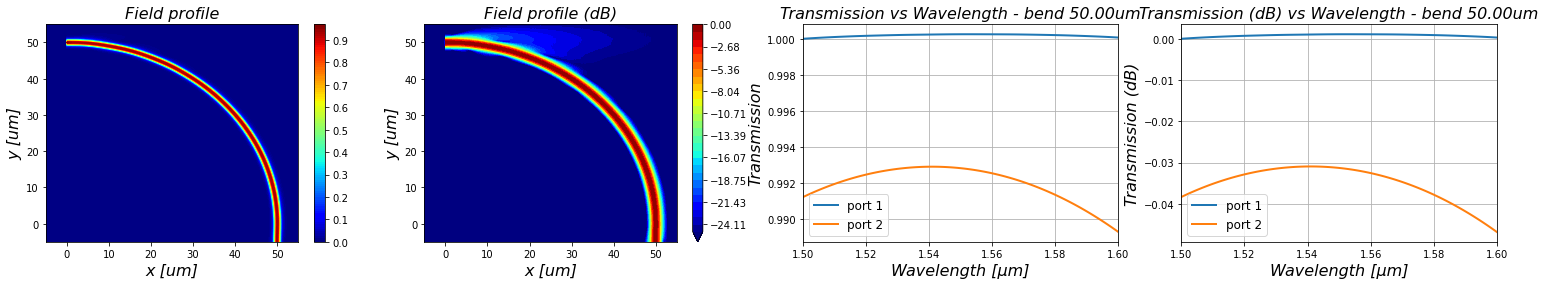

In [6]:
for i in range(len(range_raio)):
    
    raio = range_raio[i]

    fdtd.setnamed("bend90","material", SiN_fit);
    fdtd.setnamed("bend90","base angle", 90);
    fdtd.setnamed("bend90","base height", heigth);
    fdtd.setnamed("bend90","base width", width);
    fdtd.setnamed("bend90","base angle", 90);
    fdtd.setnamed("bend90","detail",0.5);
    m  = 0.55191502449;
    px = raio*np.array([[0],[m],[1],[1]]);
    py = raio*np.array([[1],[1],[m],[0]]);
    p = raio*np.array([[0,m,1,1],[1,1,m,0]])
    p = np.transpose(p)
    fdtd.setnamed("bend90","poles",p);
    fdtd.setnamed("bend90","first axis",'z');
    fdtd.setnamed("bend90","rotation 1",0);

    fdtd.setnamed("out", "x", raio);
    fdtd.setnamed("out", "x span", width);
    fdtd.setnamed("out", "y min", -20e-6);
    fdtd.setnamed("out", "y max", 0);
    fdtd.setnamed("out", "z", 0);
    fdtd.setnamed("out", "z span", heigth);
    fdtd.setnamed("out", "material", SiN_fit);

    fdtd.setnamed("in", "x min", -20e-6);
    fdtd.setnamed("in", "x max", 0);
    fdtd.setnamed("in", "y", raio);
    fdtd.setnamed("in", "y span", width);
    fdtd.setnamed("in", "z", 0);
    fdtd.setnamed("in", "z span", heigth);
    fdtd.setnamed("in", "material", SiN_fit);

    fdtd.setnamed("FDTD","background material", glass_palik_fit);
    fdtd.setnamed("FDTD", "mesh accuracy", 3);
    fdtd.setnamed("FDTD", "z min bc", "Symmetric")
    fdtd.setnamed("FDTD","x min", 0 - 5e-6);
    fdtd.setnamed("FDTD","x max", raio + 5e-6);
    fdtd.setnamed("FDTD","y min", 0 - 5e-6);
    fdtd.setnamed("FDTD","y max", raio + 5e-6);
    fdtd.setnamed("FDTD","z", 0);
    fdtd.setnamed("FDTD","z span", 8e-6);
    
    fdtd.setnamed("FDTD::ports", "monitor frequency points", 100);

    fdtd.setnamed("FDTD::ports::port 1", "x", 0);
    fdtd.setnamed("FDTD::ports::port 1", "y", raio);
    fdtd.setnamed("FDTD::ports::port 1", "y span", 5.6e-6);
    fdtd.setnamed("FDTD::ports::port 1", "z", 0);
    fdtd.setnamed("FDTD::ports::port 1", "z span", 8e-6);
    fdtd.setnamed("FDTD::ports::port 1", "injection axis", "x-axis");
    fdtd.setnamed("FDTD::ports::port 1", "direction", "Forward");
    fdtd.setnamed("FDTD::ports::port 1", "mode selection", "fundamental TE mode");

    fdtd.setnamed("FDTD::ports::port 2", "injection axis", "y-axis");
    fdtd.setnamed("FDTD::ports::port 2", "x", raio);
    fdtd.setnamed("FDTD::ports::port 2", "x span", 5.6e-6);
    fdtd.setnamed("FDTD::ports::port 2", "y", 0);
    fdtd.setnamed("FDTD::ports::port 2", "z", 0);
    fdtd.setnamed("FDTD::ports::port 2", "z span", 8e-6);
    fdtd.setnamed("FDTD::ports::port 2", "direction", "Forward");
    fdtd.setnamed("FDTD::ports::port 2", "mode selection", "fundamental TE mode");

    fdtd.setglobalsource("wavelength start", 1.5e-6);
    fdtd.setglobalsource("wavelength stop",  1.6e-6);
    fdtd.setglobalmonitor("use source limits", 1);
    fdtd.setglobalmonitor("frequency points", 10);

    fdtd.setnamed("monitor", "override global monitor settings", 1);
    fdtd.setnamed("monitor", "frequency points", 10);
    fdtd.setnamed("monitor", "x min", 0 - 5e-6);
    fdtd.setnamed("monitor","x max", raio + 5e-6);
    fdtd.setnamed("monitor","y min", 0 - 5e-6);
    fdtd.setnamed("monitor","y max", raio + 5e-6);
    fdtd.setnamed("monitor","z", 0);
    
    fdtd.setnamed("monitor_1", "x min", 0 - 5e-6);
    fdtd.setnamed("monitor_1","x max", raio + 5e-6);
    fdtd.setnamed("monitor_1","y min", 0 - 5e-6);
    fdtd.setnamed("monitor_1","y max", raio + 5e-6);
    fdtd.setnamed("monitor_1","z", 0);
    
    file = "bend90_%0.2fum.fsp" %(raio*1e6)
    fdtd.save(file);
    fdtd.run();
    
    E = fdtd.getresult("monitor","E");
    T_p1 = fdtd.getresult("FDTD::ports::port 1", "T");
    T_p2 = fdtd.getresult("FDTD::ports::port 2", "T");
    
    lambdT = T_p1['lambda']
    T_p1 = np.abs(T_p1['T'])**2
    T_p2 = np.abs(T_p2['T'])**2
    
    niveis = np.linspace(-25, 0, num = 29);

    lambd = E['lambda'];

    x = E['x']
    x = x[:,0]
    y = E['y']
    y = y[:,0]
    z = E['z']

    E = E['E']

    Ex = E[:,:,0,:,0]
    Ey = E[:,:,0,:,1]
    Ez = E[:,:,0,:,2]
    Emag = np.sqrt(np.abs(Ex)**2 + np.abs(Ey)**2 + np.abs(Ez)**2)
    Emag = Emag/Emag.max()
    logE = 10*np.log10(np.transpose(Emag[:,:,0]))
  
    fig, axs = plt.subplots(1, 4, figsize=(26,4))
    mycmap = plt.get_cmap('jet')

    img1 = axs[0].contourf(1e6*x,1e6*y,np.transpose(Emag[:,:,0]),100,cmap = mycmap);
    fig.colorbar(img1, ax=axs[0])
    axs[0].set_title('Field profile',fontsize = 16,fontstyle = 'oblique')
    axs[0].set_xlabel('x [um]',fontsize = 16, fontstyle = 'oblique')
    axs[0].set_ylabel('y [um]',fontsize = 16, fontstyle = 'oblique')
    
    img2 = axs[1].contourf(1e6*x,1e6*y,logE,100,cmap = mycmap, levels = niveis, extend = 'min')
    fig.colorbar(img2, ax=axs[1])
    axs[1].set_title('Field profile (dB)',fontsize = 16,fontstyle = 'oblique')
    axs[1].set_xlabel('x [um]',fontsize = 16, fontstyle = 'oblique')
    axs[1].set_ylabel('y [um]',fontsize = 16, fontstyle = 'oblique')
    
    axs[2].plot(1e6*lambdT, T_p1 , linewidth=2,label = 'port 1');
    axs[2].plot(1e6*lambdT, T_p2 , linewidth=2,label = 'port 2');
    axs[2].set_xlim(1.5,1.6)
    axs[2].set_title('Transmission vs Wavelength - bend %0.2fum' %(raio*1e6), fontsize=16.0, fontstyle='oblique')
    axs[2].set_xlabel('Wavelength [μm]', fontsize=16.0, fontstyle='oblique')
    axs[2].set_ylabel('Transmission', fontsize=16.0, fontstyle='oblique')
    axs[2].legend(loc='lower left', fontsize=12.0)
    axs[2].grid(True)
    
    axs[3].plot(1e6*lambdT, 10*np.log10(T_p1) , linewidth=2,label = 'port 1');
    axs[3].plot(1e6*lambdT, 10*np.log10(T_p2) , linewidth=2,label = 'port 2');
    axs[3].set_xlim(1.5,1.6)
    axs[3].set_title('Transmission (dB) vs Wavelength - bend %0.2fum' %(raio*1e6), fontsize=16.0, fontstyle='oblique')
    axs[3].set_xlabel('Wavelength [μm]', fontsize=16.0, fontstyle='oblique')
    axs[3].set_ylabel('Transmission (dB)', fontsize=16.0, fontstyle='oblique')
    axs[3].legend(loc='lower left', fontsize=12.0)
    axs[3].grid(True)
    
    fdtd.switchtolayout();
    